### Задание:

Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston.

Постройте 10-15 вариантов разных нейронных сетей и сведите результаты их работы в таблицу. Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

# from sklearn.datasets import load_boston
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Sequential, Model

%matplotlib inline

In [2]:
from keras.datasets import boston_housing

(data_train, y_train), (data_test, y_test) = boston_housing.load_data()

In [3]:
# Нормализация.
scaler = MinMaxScaler((-1,1))
X_train = scaler.fit_transform(data_train)
X_test = scaler.transform(data_test)

print(X_train[0])  # Первый тренировочный пример, нормализованный

[-9.72436739e-01 -1.00000000e+00 -4.36950147e-01 -1.00000000e+00
 -3.70370370e-01 -3.87296669e-04  8.29042225e-01 -4.05617544e-01
 -7.39130435e-01 -5.44933078e-01  7.87234043e-01  1.00000000e+00
 -6.23620309e-02]


In [4]:
len(y_train)

404

In [5]:
X_test.shape

(102, 13)

In [6]:
results = pd.DataFrame() # сводная таблица результатов
n_layers = [] # число слоев
n_nums = [] # число нейронов
act_func = [] # функция активации
opt = [] # оптимизатор
train_mse = [] # ошибка на тренировочной выборке
test_mse = [] # ошибка на тестовой выборке

Будем проверять следующие значения:<br>
n_layers: 3, 5 и 10 <br>
n_nums: 8, 32 и 128 <br>
act_func: ReLU, sigmoid и tanh <br>
opt: RMSProp и Adam<br>



Параметры текущей нейронной сети: 3 слоя, 8 нейронов, функция активации relu, оптимизатор RMSprop...
13/13 - 0s - loss: 81.7527 - mse: 81.7527 - 17ms/epoch - 1ms/step
4/4 - 0s - loss: 80.8885 - mse: 80.8885 - 16ms/epoch - 4ms/step

Параметры текущей нейронной сети: 3 слоя, 8 нейронов, функция активации relu, оптимизатор Adam...
13/13 - 0s - loss: 66.0417 - mse: 66.0417 - 19ms/epoch - 1ms/step
4/4 - 0s - loss: 62.0854 - mse: 62.0854 - 14ms/epoch - 3ms/step

Параметры текущей нейронной сети: 3 слоя, 8 нейронов, функция активации sigmoid, оптимизатор RMSprop...
13/13 - 0s - loss: 261.2886 - mse: 261.2886 - 18ms/epoch - 1ms/step
4/4 - 0s - loss: 278.5492 - mse: 278.5492 - 15ms/epoch - 4ms/step

Параметры текущей нейронной сети: 3 слоя, 8 нейронов, функция активации sigmoid, оптимизатор Adam...
13/13 - 0s - loss: 301.4756 - mse: 301.4756 - 26ms/epoch - 2ms/step
4/4 - 0s - loss: 320.6075 - mse: 320.6075 - 22ms/epoch - 5ms/step

Параметры текущей нейронной сети: 3 слоя, 8 нейронов, функция а

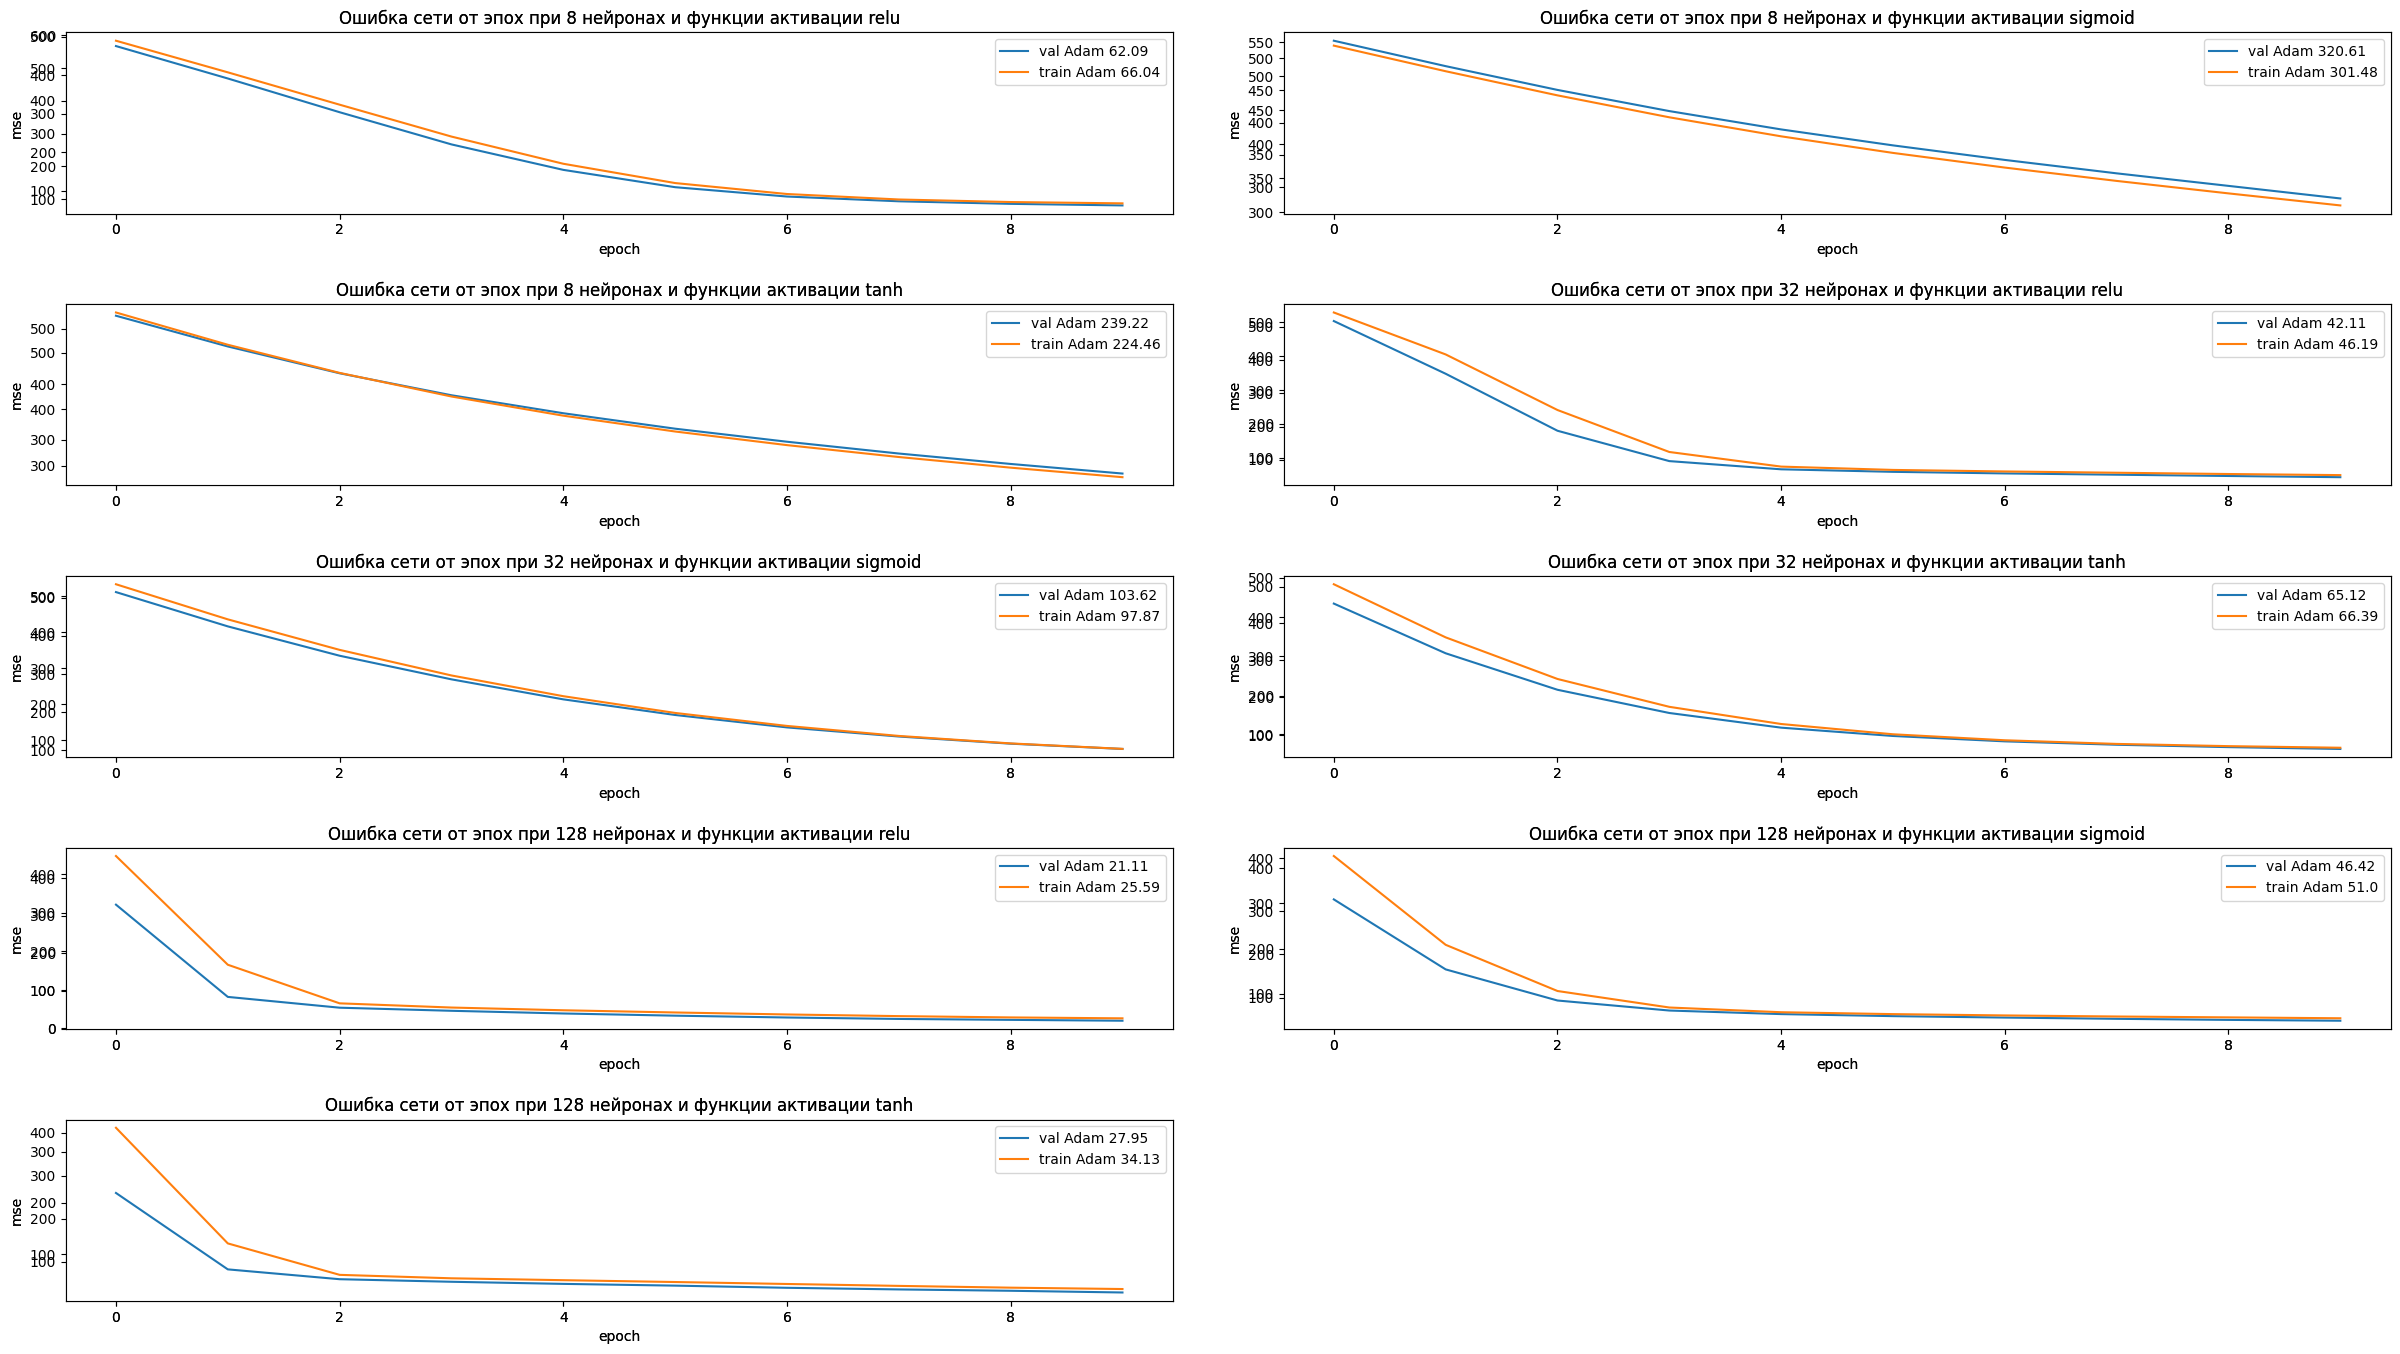

In [7]:
# Рассмотрим 3-слойную сеть
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [8, 32, 128]:
    for f in ['relu', 'sigmoid', 'tanh']:
        k += 1
        for o in ['RMSprop', 'Adam']:
            n_layers.append(3)
            n_nums.append(n)
            act_func.append(f)
            opt.append(o)
            
            print(f'\nПараметры текущей нейронной сети: 3 слоя, {n} нейронов, функция активации {f}, оптимизатор {o}...')
            
            inputs = Input(shape=(13,))
            x_1 = Flatten()(inputs)
            x_2 = Dense(n, activation=f)(x_1)
            outputs = Dense(1)(x_2)
            
            model = Model(inputs, outputs)
            
            model.compile(optimizer=o, loss='mse', metrics=['mse'])
            
            history = model.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_test, y_test), verbose=0)
            
            train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
            test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
            train_mse.append(train_m)
            test_mse.append(test_m)
            
            ax = fig.add_subplot(6, 2, k)
            ax.plot(history.history['val_mse'], label=f'val {o} {round(test_m,2)}')
            ax.plot(history.history['mse'], label=f'train {o} {round(train_m,2)}')
            ax.legend()
            ax.set_xlabel('epoch')
            ax.set_ylabel('mse')
            ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()


Параметры текущей нейронной сети: 5 слоёв, 8 нейронов, функция активации relu, оптимизатор RMSprop...
13/13 - 0s - loss: 31.1994 - mse: 31.1994 - 29ms/epoch - 2ms/step
4/4 - 0s - loss: 27.0882 - mse: 27.0882 - 23ms/epoch - 6ms/step

Параметры текущей нейронной сети: 5 слоёв, 8 нейронов, функция активации relu, оптимизатор Adam...
13/13 - 0s - loss: 28.7130 - mse: 28.7130 - 27ms/epoch - 2ms/step
4/4 - 0s - loss: 25.3602 - mse: 25.3602 - 21ms/epoch - 5ms/step

Параметры текущей нейронной сети: 5 слоёв, 8 нейронов, функция активации sigmoid, оптимизатор RMSprop...
13/13 - 0s - loss: 338.4704 - mse: 338.4704 - 26ms/epoch - 2ms/step
4/4 - 0s - loss: 359.3344 - mse: 359.3344 - 21ms/epoch - 5ms/step

Параметры текущей нейронной сети: 5 слоёв, 8 нейронов, функция активации sigmoid, оптимизатор Adam...
13/13 - 0s - loss: 341.5395 - mse: 341.5395 - 27ms/epoch - 2ms/step
4/4 - 0s - loss: 362.5370 - mse: 362.5370 - 21ms/epoch - 5ms/step

Параметры текущей нейронной сети: 5 слоёв, 8 нейронов, функ

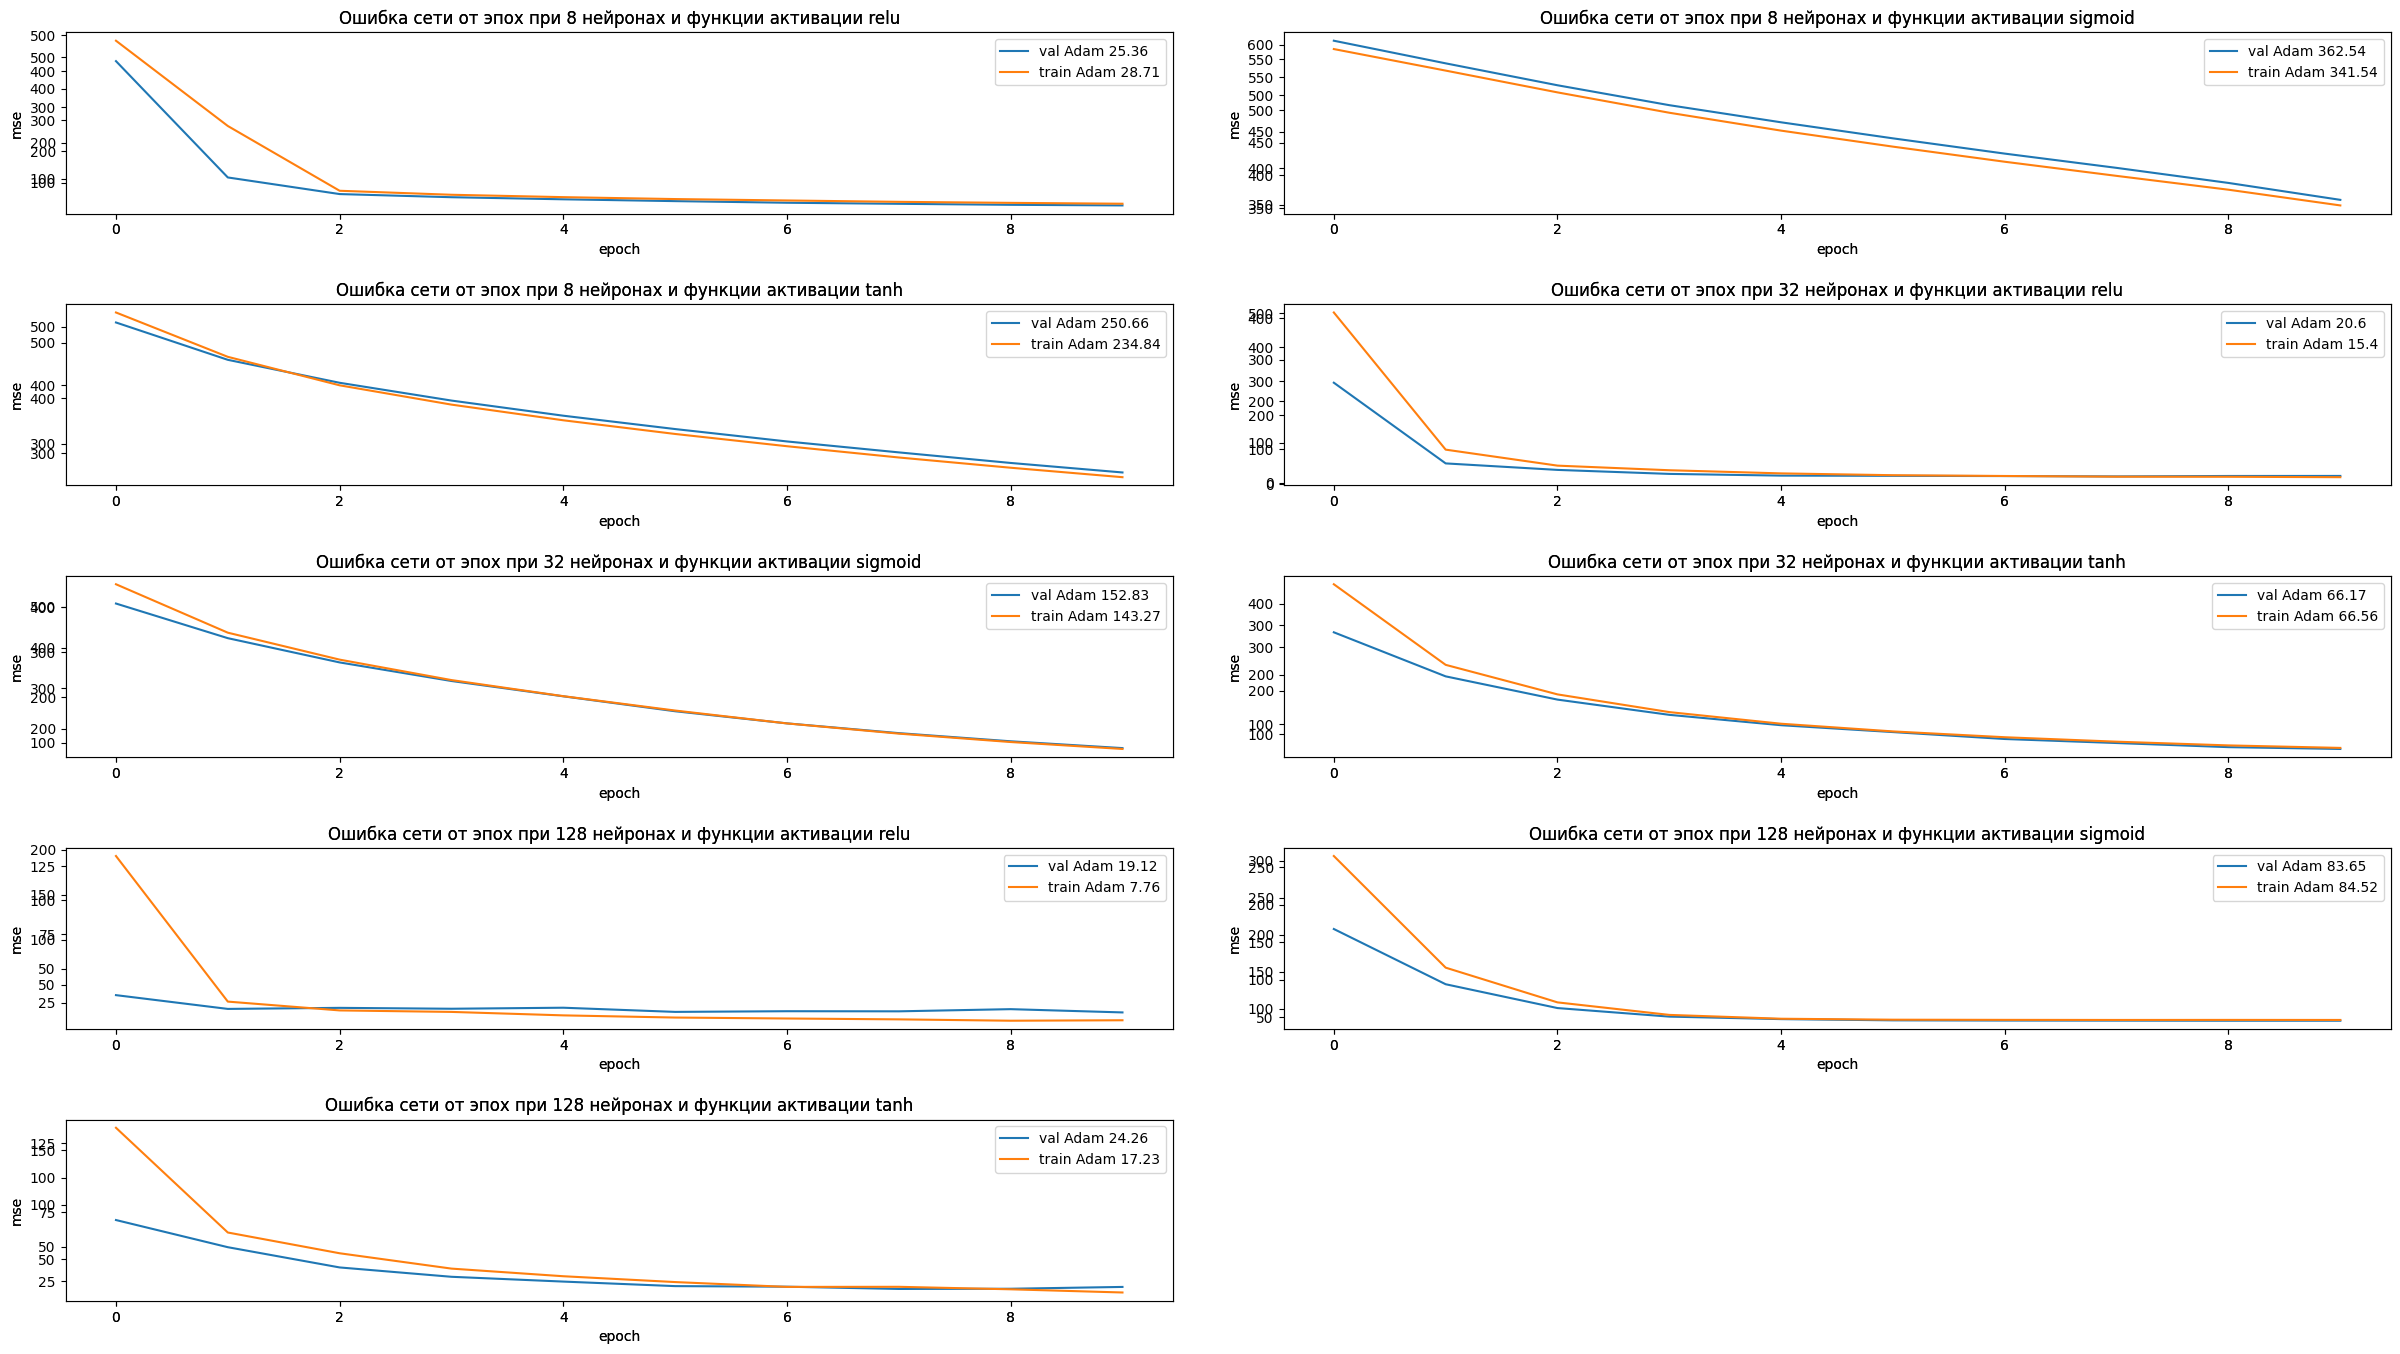

In [8]:
# Рассмотрим 5-слойную сеть
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [8, 32, 128]:
    for f in ['relu', 'sigmoid', 'tanh']:
        k += 1
        for o in ['RMSprop', 'Adam']:
            n_layers.append(5)
            n_nums.append(n)
            act_func.append(f)
            opt.append(o)
            
            print(f'\nПараметры текущей нейронной сети: 5 слоёв, {n} нейронов, функция активации {f}, оптимизатор {o}...')
            
            inputs = Input(shape=(13,))
            x_1 = Flatten()(inputs)
            x_2 = Dense(n, activation=f)(x_1)
            x_3 = Dense(n, activation=f)(x_2)
            x_4 = Dense(n, activation=f)(x_3)
            outputs = Dense(1)(x_4)
            
            model = Model(inputs, outputs)
            
            model.compile(optimizer=o, loss='mse', metrics=['mse'])
            
            history = model.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_test, y_test), verbose=0)
            
            train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
            test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
            train_mse.append(train_m)
            test_mse.append(test_m)
            
            ax = fig.add_subplot(6, 2, k)
            ax.plot(history.history['val_mse'], label=f'val {o} {round(test_m,2)}')
            ax.plot(history.history['mse'], label=f'train {o} {round(train_m,2)}')
            ax.legend()
            ax.set_xlabel('epoch')
            ax.set_ylabel('mse')
            ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()


Параметры текущей нейронной сети: 10 слоёв, 8 нейронов, функция активации relu, оптимизатор RMSprop...
13/13 - 0s - loss: 23.6321 - mse: 23.6321 - 27ms/epoch - 2ms/step
4/4 - 0s - loss: 19.4863 - mse: 19.4863 - 21ms/epoch - 5ms/step

Параметры текущей нейронной сети: 10 слоёв, 8 нейронов, функция активации relu, оптимизатор Adam...
13/13 - 0s - loss: 25.8534 - mse: 25.8534 - 26ms/epoch - 2ms/step
4/4 - 0s - loss: 22.5363 - mse: 22.5363 - 22ms/epoch - 5ms/step

Параметры текущей нейронной сети: 10 слоёв, 8 нейронов, функция активации sigmoid, оптимизатор RMSprop...
13/13 - 0s - loss: 449.0656 - mse: 449.0656 - 28ms/epoch - 2ms/step
4/4 - 0s - loss: 474.2463 - mse: 474.2463 - 21ms/epoch - 5ms/step

Параметры текущей нейронной сети: 10 слоёв, 8 нейронов, функция активации sigmoid, оптимизатор Adam...
13/13 - 0s - loss: 288.7464 - mse: 288.7464 - 27ms/epoch - 2ms/step
4/4 - 0s - loss: 307.3622 - mse: 307.3622 - 22ms/epoch - 6ms/step

Параметры текущей нейронной сети: 10 слоёв, 8 нейронов,

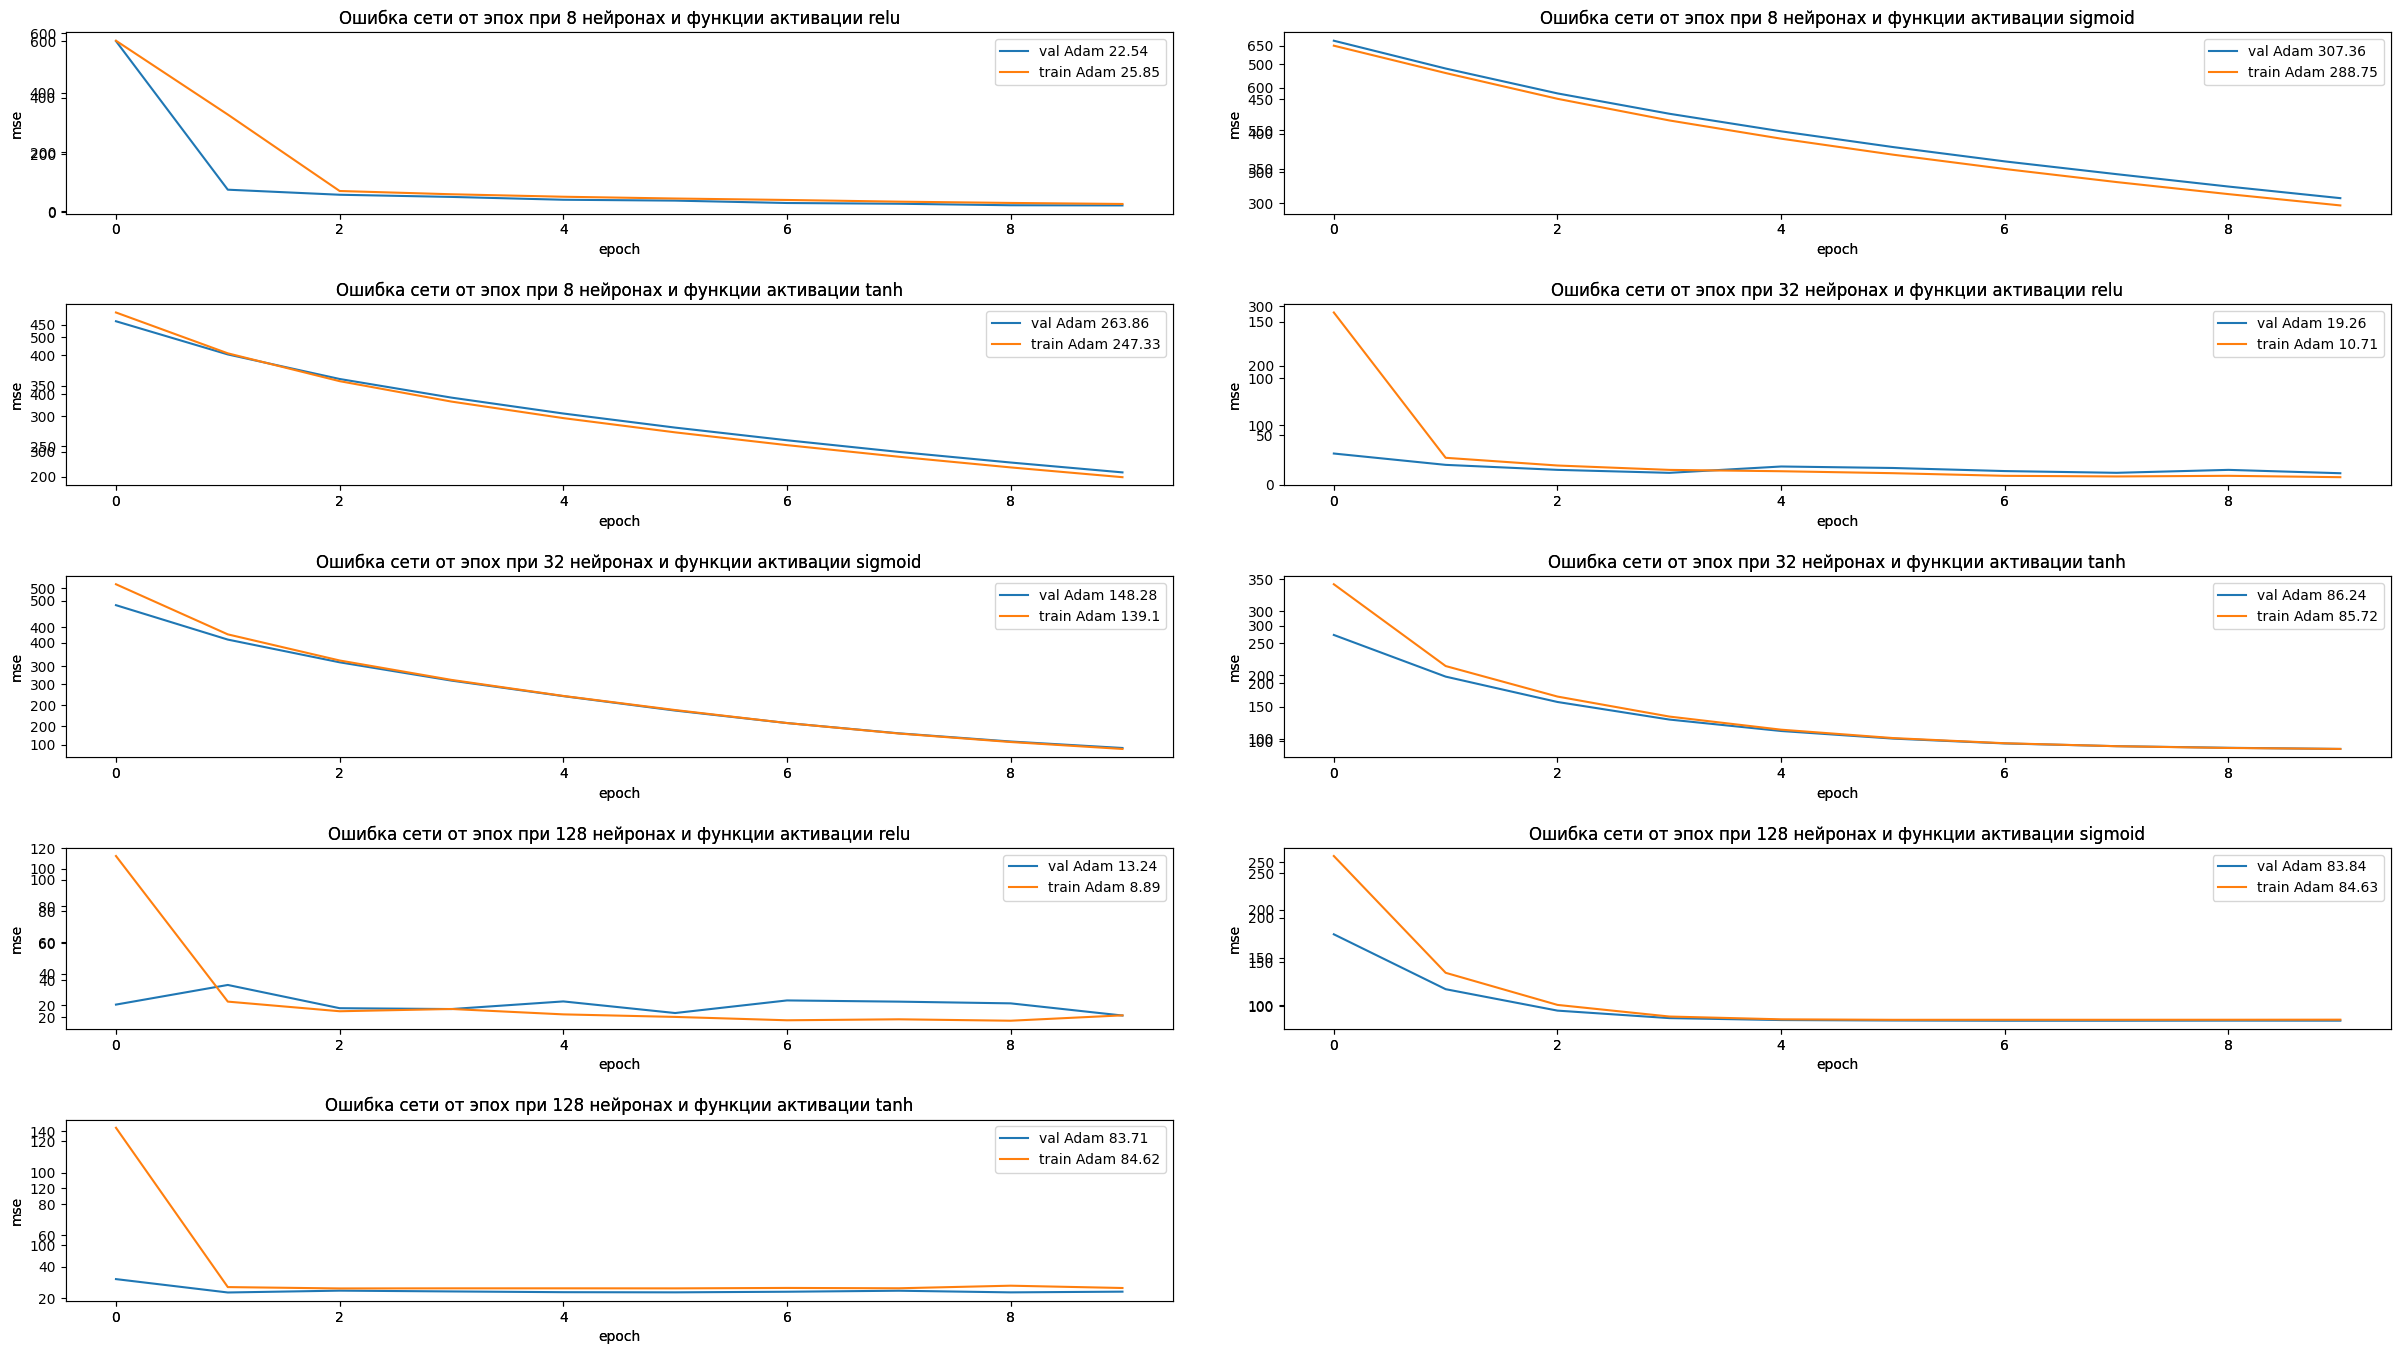

In [9]:
# Рассмотрим 10-слойную сеть
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [8, 32, 128]:
    for f in ['relu', 'sigmoid', 'tanh']:
        k += 1
        for o in ['RMSprop', 'Adam']:
            n_layers.append(10)
            n_nums.append(n)
            act_func.append(f)
            opt.append(o)
            
            print(f'\nПараметры текущей нейронной сети: 10 слоёв, {n} нейронов, функция активации {f}, оптимизатор {o}...')
            
            inputs = Input(shape=(13,))
            x_1 = Flatten()(inputs)
            x_2 = Dense(n, activation=f)(x_1)
            x_3 = Dense(n, activation=f)(x_2)
            x_4 = Dense(n, activation=f)(x_3)
            x_5 = Dense(n, activation=f)(x_4)
            x_6 = Dense(n, activation=f)(x_5)
            x_7 = Dense(n, activation=f)(x_6)
            x_8 = Dense(n, activation=f)(x_7)
            x_9 = Dense(n, activation=f)(x_8)
            outputs = Dense(1)(x_9)
            
            model = Model(inputs, outputs)
            
            model.compile(optimizer=o, loss='mse', metrics=['mse'])
            
            history = model.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_test, y_test), verbose=0)
            
            train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
            test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
            train_mse.append(train_m)
            test_mse.append(test_m)
            
            ax = fig.add_subplot(6, 2, k)
            ax.plot(history.history['val_mse'], label=f'val {o} {round(test_m,2)}')
            ax.plot(history.history['mse'], label=f'train {o} {round(train_m,2)}')
            ax.legend()
            ax.set_xlabel('epoch')
            ax.set_ylabel('mse')
            ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()

In [10]:
results['n_layers'] = n_layers
results['n_nums'] = n_nums
results['act_func'] = act_func
results['opt'] = opt
results['train_mse'] = train_mse
results['test_mse'] = test_mse
results['overtr_diff'] = results['test_mse'] - results['train_mse']

In [11]:
results.sort_values(by=['test_mse','overtr_diff'], ascending=[True, True])

,n_layers,n_nums,act_func,opt,train_mse,test_mse,overtr_diff
49,10,128,relu,Adam,8.894053,13.240147,4.346094
42,10,32,relu,RMSprop,10.202837,16.586220,6.383383
30,5,128,relu,RMSprop,9.286501,18.050322,8.763821
34,5,128,tanh,RMSprop,13.780378,18.333666,4.553288
31,5,128,relu,Adam,7.758141,19.120886,11.362745
43,10,32,relu,Adam,10.710425,19.256851,8.546426
36,10,8,relu,RMSprop,23.632088,19.486273,-4.145815
12,3,128,relu,RMSprop,25.295927,20.575804,-4.720123
25,5,32,relu,Adam,15.397270,20.596062,5.198792
24,5,32,relu,RMSprop,16.576448,21.037655,4.461206


##### Выводы
1. Лучшее качество получилось на количестве слоев = 10 и нейронов = 128.
2. Наименьшая ошибка получается с оптимизатором Adam.

Лушее качество получилось при [10,	128, relu,	Adam]: <br>
Получим предсказания модели для обех выборок:

In [12]:
inputs = Input(shape=(13,))
x_1 = Flatten()(inputs)
x_2 = Dense(128, activation='relu')(x_1)
x_3 = Dense(128, activation='relu')(x_2)
x_4 = Dense(128, activation='relu')(x_3)
x_5 = Dense(128, activation='relu')(x_4)
x_6 = Dense(128, activation='relu')(x_5)
x_7 = Dense(128, activation='relu')(x_6)
x_8 = Dense(128, activation='relu')(x_7)
x_9 = Dense(128, activation='relu')(x_8)
outputs = Dense(1)(x_9)

model = Model(inputs, outputs)

model.compile(optimizer='Adam',
                    loss='mse',
                    metrics=['mse'])

model.summary()

history = model.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_test, y_test), verbose=1)

train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)

Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_55 (InputLayer)       [(None, 13)]              0         
                                                                 
 flatten_54 (Flatten)        (None, 13)                0         
                                                                 
 dense_270 (Dense)           (None, 128)               1792      
                                                                 
 dense_271 (Dense)           (None, 128)               16512     
                                                                 
 dense_272 (Dense)           (None, 128)               16512     
                                                                 
 dense_273 (Dense)           (None, 128)               16512     
                                                                 
 dense_274 (Dense)           (None, 128)               165

In [13]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [14]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Коэффициент детерминации на тренировочной выборке: {round(r2_train,2)}')
print(f'Коэффициент детерминации на тестовой выборке: {round(r2_test,2)}')

Коэффициент детерминации на тренировочной выборке: 0.82
Коэффициент детерминации на тестовой выборке: 0.8


### Общий вывод

В итоге добились сравнительно неплохого качества модели. <br>
Точность увеличивается с ростом числа слоев и числа нейронов.<br>
Оптимизаторы и функции активации надо подбирать исходя из количества слоев и нейронов, так как разные значения показывают разное качество и нет ярко-выраженной зависимости. <br>
Для задач регрессии больше подходят функции активации relu.<br>

А самое интересное наблюдение - при каждом новом запуске, параметры модели с наименьшей ошибки каждый раз менялся.
Как и итоговые коэффициенты.